In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, models

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)

(60000, 28, 28)


In [113]:
x_train_normalized = x_train / 255
print(np.max(x_train_normalized))
print(x_train_normalized)

x_test_normalized = x_test / 255


1.0
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [114]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train_standardized = np.abs(x_train - mean) / std
print(x_train_standardized)

[[[0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  ...
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]]

 [[0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  ...
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]]

 [[0.42407389 0.42407389 0.42407389 ... 0.42407389 0.42407389 0.42407389]
  [0.42407389 0.424073

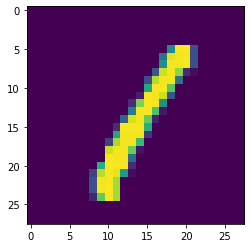

In [115]:
#plt.plot(x_train[0])
plt.imshow(x_train[3])


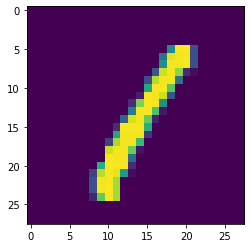

In [116]:
plt.imshow(x_train_normalized[3])

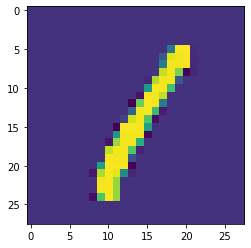

In [117]:
plt.imshow(x_train_standardized[3])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
#augmented_images = imageDataGen.flow(x_train_normalized[:1].reshape((1, 28, 28, 1)))
augmented_images = imageDataGen.flow(x_train_normalized.reshape((-1, 28, 28, 1)), y_train, batch_size=1)

In [119]:
#plt.figure(figsize=(8, 4))

#for i in range(6):
#    plt.subplot(2, 3, i+1)
#    plt.imshow(augmented_images[0][0, :, :, 0], cmap='gray')
#    plt.title(f"Augmented {i+1}")
#    plt.axis('off')

#plt.show()

In [120]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [121]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
# Train the model
model.fit(augmented_images, epochs=5, validation_data=(x_test_normalized, y_test))  # You might need to adjust the number of epochs

Epoch 1/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.6540 - accuracy: 0.7820 - val_loss: 0.1691 - val_accuracy: 0.9502
Epoch 2/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3500 - accuracy: 0.8953 - val_loss: 0.2321 - val_accuracy: 0.9463
Epoch 3/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3253 - accuracy: 0.9051 - val_loss: 0.1567 - val_accuracy: 0.9627
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3170 - accuracy: 0.9091 - val_loss: 0.2360 - val_accuracy: 0.9584
Epoch 5/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3134 - accuracy: 0.9126 - val_loss: 0.1654 - val_accuracy: 0.9660
